In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

In [2]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

Data Preprocessing

In [4]:
import cv2
import imghdr

In [5]:
data_dir = 'data' 

In [6]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

Delete pictures where its extention is not in image_exts

In [7]:
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

Load Data


In [8]:
import numpy as np
from matplotlib import pyplot as plt

In [9]:
data = tf.keras.utils.image_dataset_from_directory('data1')

Found 333 files belonging to 2 classes.


transform data to numpy

In [10]:
data_iterator = data.as_numpy_iterator()

split data into batchs

In [11]:
batch = data_iterator.next()

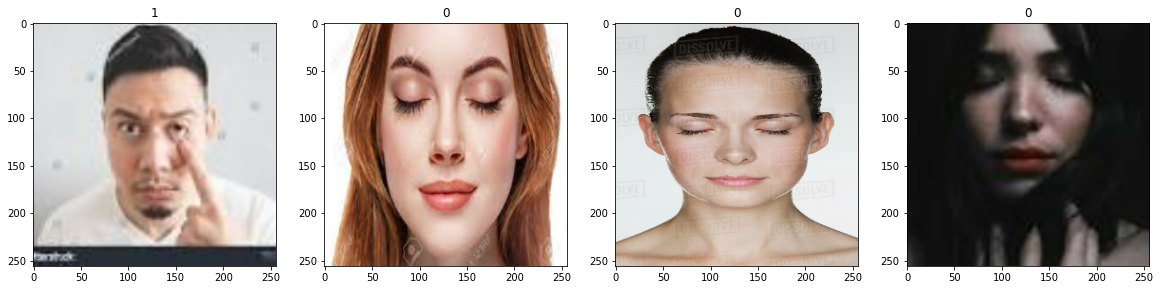

In [12]:
#1 awake
#0 asleep
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

Scale Data

In [13]:
data = data.map(lambda x,y: (x/255, y))

In [14]:
batch[0].shape

(32, 256, 256, 3)

In [15]:
batch[1]

array([1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 0], dtype=int32)

In [16]:
data.as_numpy_iterator().next()[0].min()

0.0

Split Data

In [17]:
len(data)

11

In [18]:
train_size = int(len(data)*.7)+1
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)

In [19]:
test_size+val_size+train_size

12

In [20]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

Model Building

In [21]:
train

<TakeDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [23]:
model = Sequential()

In [24]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(64, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())
model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [25]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

Train


In [27]:
logdir='logs'

In [28]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [29]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
8/8 [==============================] - 6s 155ms/step - loss: 0.9921 - accuracy: 0.5156 - val_loss: 0.6794 - val_accuracy: 0.6104
Epoch 2/20
8/8 [==============================] - 1s 103ms/step - loss: 0.6785 - accuracy: 0.5469 - val_loss: 0.6695 - val_accuracy: 0.5584
Epoch 3/20
8/8 [==============================] - 1s 113ms/step - loss: 0.6748 - accuracy: 0.6094 - val_loss: 0.6881 - val_accuracy: 0.5195
Epoch 4/20
8/8 [==============================] - 1s 110ms/step - loss: 0.6706 - accuracy: 0.5898 - val_loss: 0.6486 - val_accuracy: 0.6494
Epoch 5/20
8/8 [==============================] - 1s 112ms/step - loss: 0.6307 - accuracy: 0.6250 - val_loss: 0.6144 - val_accuracy: 0.6883
Epoch 6/20
8/8 [==============================] - 1s 103ms/step - loss: 0.5772 - accuracy: 0.7148 - val_loss: 0.5281 - val_accuracy: 0.8052
Epoch 7/20
8/8 [==============================] - 1s 99ms/step - loss: 0.5610 - accuracy: 0.6836 - val_loss: 0.4933 - val_accuracy: 0.8312
Epoch 8/20
8/8 [=====

Performance

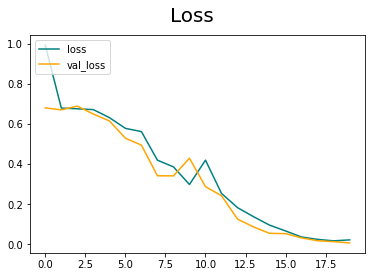

In [30]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

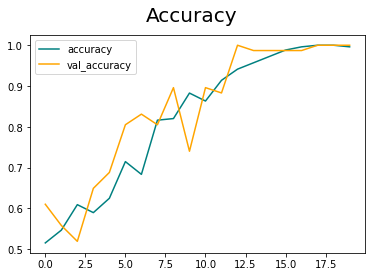

In [34]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

Evaluate

In [35]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [36]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [37]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

In [38]:
print(pre.result(), re.result(), acc.result())

tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32) tf.Tensor(0.0, shape=(), dtype=float32)


Test

In [39]:
import cv2

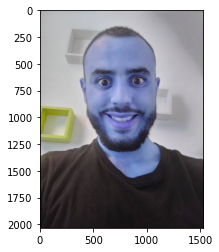

In [69]:
img = cv2.imread('achawake.jpg')
plt.imshow(img)
plt.show()

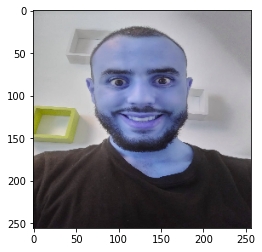

In [70]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [71]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 13ms/step


In [72]:
yhat

array([[0.99998164]], dtype=float32)

In [59]:
if yhat > 0.5: 
    print(f'Predicted Awake')
else:
    print(f'Predicted Asleep')

Predicted Awake


Saving Model

In [42]:
from tensorflow.keras.models import load_model

In [43]:
model.save(os.path.join('models','caralarmv3.h5'))

In [44]:
new_model = load_model(os.path.join('models','caralarmv1.h5'))

In [45]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 62ms/step


array([[0.34194058]], dtype=float32)